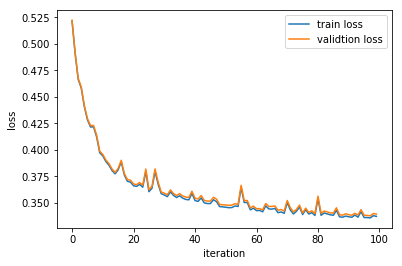

In [18]:
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import math
import numpy
import random
def getData():
    data = load_svmlight_file("C:/Users/YOUNA/Desktop/a9a.txt")
    return data[0], data[1]

def model(weigth,x):
    return 1/(1+math.exp(-1*x.dot(weight)))

def loss(weight,x,y):  
    totalLoss=0
    n = x.shape[0]
    for i in range(n):
        value=model(weight,x[i])
        totalLoss=totalLoss-1/n*(y[i]*math.log(value)+((1-y[i])*math.log(1-value)))    
    return totalLoss
 
def gradiend(weight,x,y):
    gradofW=0
    n = x.shape[0]
    for i in range(n):
        gradofW=gradofW+(model(weight,x[i])-y[i])*x[i]/n
    return gradofW
def RMSprop(grad,learningRate,dampingRate,stabilization):
    r=(1-dampingRate)*(grad**2)
    deltaofW=grad
    for i in range(grad.shape[0]):
        deltaofW[i]=-1*learningRate*grad[i]/(stabilization+math.sqrt(r[i]*1.0))                                   
    return deltaofW

def Adam(weight,step,stabilization,stampingRate1,stampingRate2):
    s=numpy.zeros((1,weight.shape[0]))
    r=numpy.zeros((1,weight.shape[0]))
    s=stampingRate1*s+(1-stampingRate1)*weight
    r=stampingRate2*r+(1-stampingRate2)*weight**2
    vs=s/(1-stampingRate1)
    vr=r/(1-stampingRate2)
    deltaofW=weight
    for i in range(weight.shape[0]):
        deltaofW[i]=-step*vs[0][i]/(math.sqrt(vr[0][i])+stabilization)
    return deltaofW

def NAG(grad,preUpdate,miu,alpha,x,y):
    gradofW=0
    n = x.shape[0]
    newWeight=grad+miu*preUpdate
    for i in range(n):
        gradofW=gradofW+(model(newWeight,x[i])-y[i])*x[i]/n
    update = miu*preUpdate-alpha*gradofW
    return update

def AdaDelta(tparams,grads):
    p=0.95;e=1e-6
    delta_x2=[theano.shared(p.get_value() * floatX(0.)) for k, p in tparams.iteritems()]
    g2 = [theano.shared(p.get_value() * floatX(0.)) for k, p in tparams.iteritems()]
    update_g2=[(g2, p * g2 + (1-p) * (g ** 2)) for g2, g in zip(g2, grads)]
    fn_update_1=theano.function(inputs=[],updates=update_g2)
    delta_x=[-T.sqrt(delta_x2_last + e) / T.sqrt(g2_now + e) * g for g, delta_x2_last, g2_now in zip(grads,delta_x2,g2)]
    update_delta_x2=[(delta_x2, p * delta_x2 + (1-p) * (delta_x ** 2)) for delta_x2, delta_x in zip(delta_x2, delta_x)]
    update_param=[(param, param + delta) for param, delta in zip(tparams.values(), delta_x)]
    fn_update_2=theano.function(inputs=[],updates=update_delta_x2+update_param)
    return fn_update_2
    
    
x, y = getData()
x=x.toarray()

for i in range(x.shape[0]):
    if(y[i]==-1):
         y[i]=0


xTrain, xValidatuon, yTrain, yValiidation = train_test_split(x, y, test_size=0.5, random_state=42)
weight = numpy.zeros(xTrain.shape[1])

iteration = 100
learningRate = 0.1 
trainLoss = []
validateLoss = []
tpparams=[]
preUpdate=numpy.zeros(xTrain.shape[1])
preGrad=numpy.zeros(xTrain.shape[1])
for i in range(iteration):
    rand=[]
    X=numpy.zeros((100,xTrain.shape[1]))
    Y=numpy.zeros((100,))
    for j in range(100):
        rand.append(random.randint(0,xTrain.shape[0]-1))
    for k in range(len(rand)):
        X[k]=xTrain[rand[k]]
        Y[k]=yTrain[rand[k]]
    grad = gradiend(weight,X,Y)
    
#    weight =weight-learningRate*grad
#    weight = weight + RMSprop(grad,learningRate,0.1,0.0000001)
#    weight = weight + Adam(grad,0.1,0.000000001,0.9,0.999)
    update=NAG(weight,preUpdate,0.01,0.9,X,Y)
    weight = weight+update
    trainLoss.append(loss(weight,xTrain,yTrain))
    validateLoss.append(loss(weight,xValidatuon,yValiidation))
    preGrad=grad
    preUpdate=update
 
plt.plot(range(iteration),trainLoss, label='train loss')
plt.plot(range(iteration),validateLoss, label='validtion loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()